In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_RandomForest.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/test.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_RandomForest1.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_LogisticRegression.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_SupportVectorMachine.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_NeuralNetwork.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_RandomForest2.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/train.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/null-0/submission_LogisticRegression.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/null-0/submission_SupportVectorMachine.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/null-0/submission_NeuralNetwork.csv
/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/null-0/submission_RandomForest2.csv


In [2]:
test = pd.read_csv("/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/test.csv")
train = pd.read_csv("/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/train.csv")

In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [5]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [6]:
test.describe()

,condition,length(m),height(cm),X1,X2
count,7453.000000,8072.000000,8072.000000,8072.000000,8072.000000
mean,0.886623,0.507265,27.451163,5.254336,4.505327
std,0.770950,0.289615,12.917903,6.505841,3.523568
min,0.000000,0.000000,5.010000,0.000000,0.000000
25%,0.000000,0.260000,16.277500,0.000000,1.000000
50%,1.000000,0.510000,27.410000,0.000000,4.000000
75%,1.000000,0.760000,38.480000,13.000000,9.000000
max,2.000000,1.000000,49.990000,18.000000,9.000000


In [7]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [8]:
test.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [9]:
train.drop(['breed_category','pet_category'],axis=1)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4
...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9


In [10]:
dataset = pd.concat([train.drop(['breed_category','pet_category'],axis=1),test])

In [11]:
print(dataset)

          pet_id           issue_date         listing_date  condition  \
0     ANSL_69903  2016-07-10 00:00:00  2016-09-21 16:25:00        2.0   
1     ANSL_66892  2013-11-21 00:00:00  2018-12-27 17:47:00        1.0   
2     ANSL_69750  2014-09-28 00:00:00  2016-10-19 08:24:00        NaN   
3     ANSL_71623  2016-12-31 00:00:00  2019-01-25 18:30:00        1.0   
4     ANSL_57969  2017-09-28 00:00:00  2017-11-19 09:38:00        2.0   
...          ...                  ...                  ...        ...   
8067  ANSL_66809  2016-02-10 00:00:00  2017-03-10 14:56:00        2.0   
8068  ANSL_59041  2015-12-07 00:00:00  2018-02-12 00:00:00        0.0   
8069  ANSL_60034  2015-12-08 00:00:00  2017-01-04 17:19:00        0.0   
8070  ANSL_58066  2016-06-28 00:00:00  2017-07-20 18:19:00        NaN   
8071  ANSL_69436  2016-02-02 00:00:00  2017-02-28 16:47:00        0.0   

       color_type  length(m)  height(cm)  X1  X2  
0     Brown Tabby       0.80        7.78  13   9  
1           White    

In [12]:
dataset['issue_date'] = pd.to_datetime(dataset['issue_date'])

In [13]:
dataset['listing_date'] = pd.to_datetime(dataset['listing_date'])

In [14]:
dataset['duration'] = (dataset['listing_date'] - dataset['issue_date']).dt.days  

In [15]:
dataset = dataset.drop(['pet_id','issue_date','listing_date'],axis=1)

In [16]:
print(dataset)

      condition   color_type  length(m)  height(cm)  X1  X2  duration
0           2.0  Brown Tabby       0.80        7.78  13   9        73
1           1.0        White       0.72       14.19  13   9      1862
2           NaN        Brown       0.15       40.90  15   4       752
3           1.0        White       0.62       17.82   0   1       755
4           2.0        Black       0.50       11.06  18   4        52
...         ...          ...        ...         ...  ..  ..       ...
8067        2.0        Brown       0.82       36.08  13   9       394
8068        0.0          Tan       0.49       27.54  13   9       798
8069        0.0        Black       0.98       37.19   0   7       393
8070        NaN        Black       0.79       23.83   0   2       387
8071        0.0        Black       0.64       24.51   0   1       392

[26906 rows x 7 columns]


In [17]:
info = pd.DataFrame()
info['length(m)'] = [np.percentile(dataset['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(dataset['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(dataset['duration'],25*i) for i in range(1,4)]
info

,length(m),height(cm),duration
0,0.25,16.21,120.0
1,0.50,27.36,392.0
2,0.76,38.78,1116.0


In [18]:
info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,16.210,120.0
1,0.500,27.360,392.0
2,0.760,38.780,1116.0
3,-0.515,-17.645,-1374.0
4,1.525,72.635,2610.0


* Q1 - 1.5 * IQR or Q3 + 1.5 * IQR
* Q1 - 1.5 * (Q3-Q1) or Q3 + 1.5 * (Q3-Q1)
* 2.5 Q1 - 1.5 Q3 or 2.5 Q3 - 1.5 Q1 

In [19]:
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [20]:
dataset.dtypes

condition     float64
color_type     object
length(m)     float64
height(cm)    float64
X1              int64
X2              int64
duration        int64
dtype: object

In [21]:
df = dataset['color_type'].value_counts().plot(kind='barh')
df.plot(figsize=(10,10));

In [22]:
numerical = dataset.dtypes[dataset.dtypes != object].index

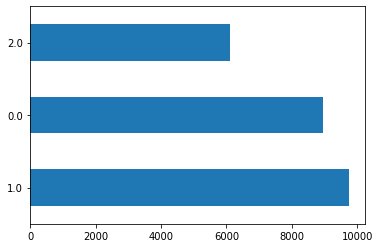

In [23]:
dataset['condition'].value_counts().plot(kind='barh')

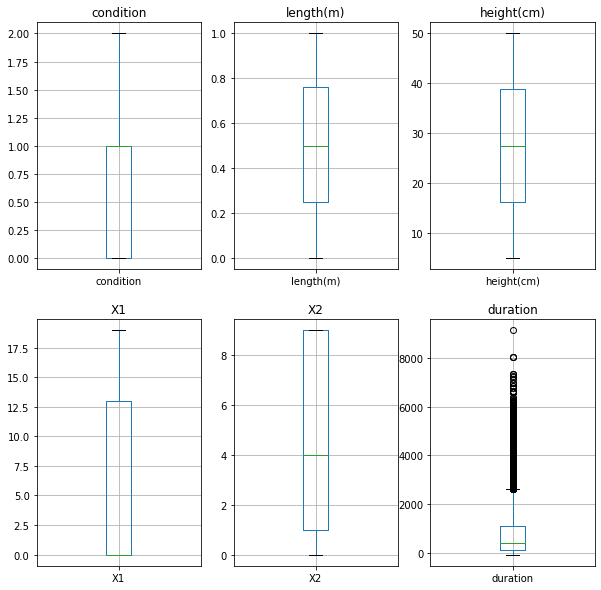

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3,figsize=(10,10))

for i in range(3):
    dataset.boxplot(column=list(numerical)[i], ax=ax[0,i])
    ax[0,i].title.set_text(numerical[i])

for i in range(3):
    dataset.boxplot(column=list(numerical)[i+3], ax=ax[1,i])
    ax[1,i].title.set_text(numerical[3+i])

In [25]:
from tqdm import tqdm
tqdm.pandas()
dataset['length_range'] = dataset['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
dataset['height_range'] = dataset['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
dataset['duration_range'] = dataset['duration'].progress_apply(lambda x:range_part('duration',x))
dataset

/home/metagogy/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 26906/26906 [00:01<00:00, 21814.21it/s]


,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range
0,2.0,Brown Tabby,0.80,7.78,13,9,73,4,1,1
1,1.0,White,0.72,14.19,13,9,1862,3,1,4
2,NaN,Brown,0.15,40.90,15,4,752,1,4,3
3,1.0,White,0.62,17.82,0,1,755,3,2,3
4,2.0,Black,0.50,11.06,18,4,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,394,4,3,3
8068,0.0,Tan,0.49,27.54,13,9,798,2,3,3
8069,0.0,Black,0.98,37.19,0,7,393,4,3,3
8070,NaN,Black,0.79,23.83,0,2,387,4,2,2


### Feature Engineering using missing values

In [ ]:
def impute_nan(dataset,variable,mean):
    dataset[variable+"_mean"]=dataset[variable].fillna(mean)
    dataset[variable+"_median"]=dataset[variable].fillna(median)

In [ ]:
median=dataset.condition.median()
mean=dataset.condition.mean()

In [ ]:
impute_nan(dataset,'condition',mean)
impute_nan(dataset,'condition',median)
dataset.head()

In [ ]:
dataset["condition_three"]=dataset['condition'].fillna(3.0)
dataset

In [ ]:
dataset["condition_minusone"]=dataset['condition'].fillna(-1)
dataset

In [ ]:
dataset["condition_one"]=dataset['condition'].fillna(1.0)
dataset

In [ ]:
def impute_nan(dataset,variable):
    most_frequent_category=dataset[variable].mode()[0]
    dataset[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
impute_nan(dataset,'condition')
dataset

In [ ]:
import numpy as np
dataset['condition_var']=np.where(dataset['condition'].isnull(),1,0)
dataset

In [ ]:
impute_nan(dataset,'condition',mode)
dataset.head()

In [26]:
from sklearn.preprocessing import LabelEncoder
dataset['color_number'] = LabelEncoder().fit_transform(dataset['color_type'])
dataset = dataset[['condition','length_range','height_range','duration_range','color_number','X1','X2']].fillna(-1)
dataset

,condition,length_range,height_range,duration_range,color_number,X1,X2
0,2.0,4,1,1,18,13,9
1,1.0,3,1,4,53,13,9
2,1.0,1,4,3,15,15,4
3,1.0,3,2,3,53,0,1
4,2.0,2,1,1,2,18,4
...,...,...,...,...,...,...,...
8067,2.0,4,3,3,15,13,9
8068,0.0,2,3,3,48,13,9
8069,0.0,4,3,3,2,0,7
8070,1.0,4,2,2,2,0,2


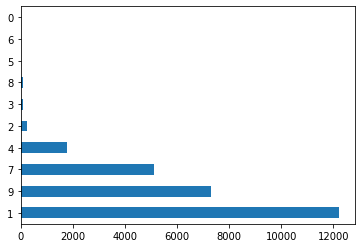

In [27]:
dataset['X2'].value_counts().plot(kind='barh')

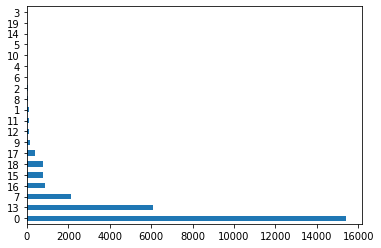

In [28]:
dataset['X1'].value_counts().plot(kind='barh')

### KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=27)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)

### BayesianRidge Imputation 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(BayesianRidge())
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)
dataset

https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/

In [ ]:
X_tr, y_tr = dataset.iloc[:len(train)], train['breed_category']
X_test = dataset.iloc[len(train):]

### Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
ETC = ExtraTreesClassifier()
ETC.fit(X_tr, y_tr)

In [ ]:
print(ETC.feature_importances_)

In [ ]:
feat_importances = pd.Series(ETC.feature_importances_, index=X_tr.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns
get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Logistic Regression

/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


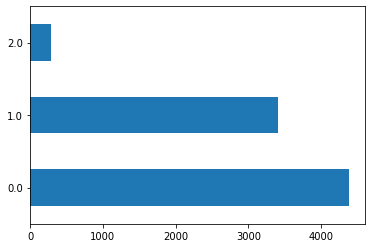

In [29]:
from sklearn.linear_model import LogisticRegression
X_tr, y_tr = dataset.iloc[:len(train)], train['breed_category']
X_test = dataset.iloc[len(train):]
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)
y_LR = LR.predict(X_test)
pd.DataFrame(y_LR, columns=['Value'])['Value'].value_counts().plot(kind='barh')

### Support Vector Machine (SVM)

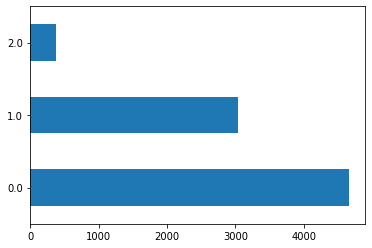

In [30]:
from sklearn.svm import SVC
SVM = SVC(decision_function_shape="ovo").fit(X_tr, y_tr)
y_SVC = SVM.predict(X_test)
pd.DataFrame(y_SVC, columns=['Value'])['Value'].value_counts().plot(kind='barh')

### RandomForestClassifier 

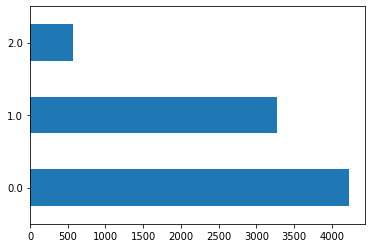

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr)
y_RF = RF.predict(X_test)
pd.DataFrame(y_RF, columns=['Value'])['Value'].value_counts().plot(kind='barh')

### MLPClassifier

/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


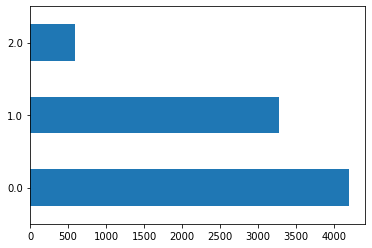

In [32]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_tr, y_tr)
y_NN = NN.predict(X_test)
pd.DataFrame(y_NN, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_tr, y_tr)
y_knn = knn.predict(X_test)
pd.DataFrame(y_knn, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [33]:
z_tr = train['pet_category']
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, z_tr)
z_LR = LR.predict(X_test)
SVM = SVC(decision_function_shape="ovo").fit(X_tr, z_tr)
z_SVC = SVM.predict(X_test)
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, z_tr)
z_RF = RF.predict(X_test)
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_tr, z_tr)
z_NN = NN.predict(X_test)

/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/metagogy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


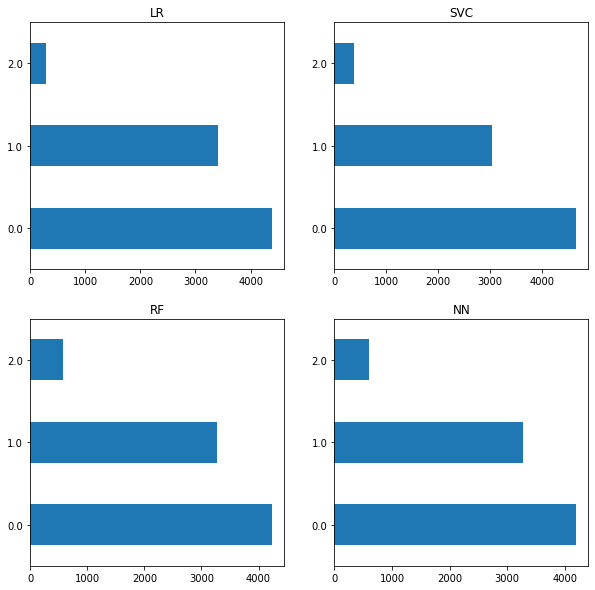

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,10))

title = ['LR', 'SVC', 'RF','NN']
y_value = [y_LR, y_SVC, y_RF,y_NN]
z_value = [z_LR, z_SVC, z_RF,z_NN]

for i in range(2):
    pd.DataFrame(y_value[i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[0,i])
    ax[0,i].title.set_text(title[i])

for i in range(2):
    pd.DataFrame(y_value[2+i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[1,i])
    ax[1,i].title.set_text(title[2+i])

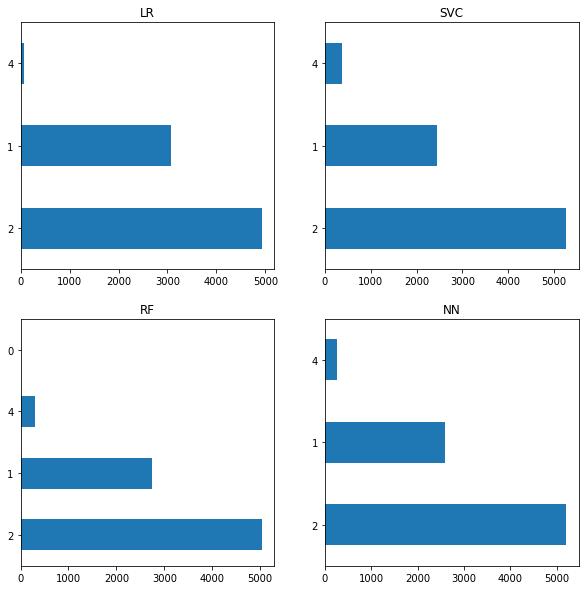

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,10))

title = ['LR', 'SVC', 'RF','NN']
y_value = [y_LR, y_SVC, y_RF,y_NN]
z_value = [z_LR, z_SVC, z_RF,z_NN]

for i in range(2):
    pd.DataFrame(z_value[i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[0,i])
    ax[0,i].title.set_text(title[i])

for i in range(2):
    pd.DataFrame(z_value[2+i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[1,i])
    ax[1,i].title.set_text(title[2+i])

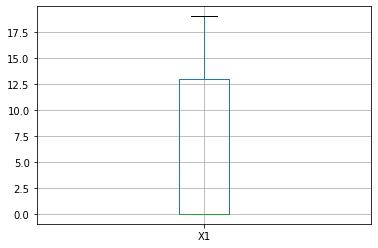

In [36]:
train.boxplot(column='X1')

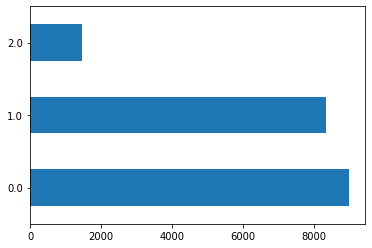

In [37]:
train['breed_category'].value_counts().plot(kind='barh')

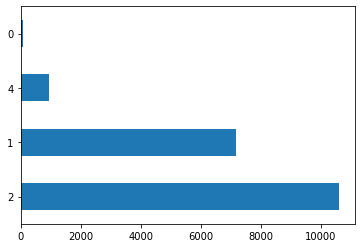

In [38]:
train['pet_category'].value_counts().plot(kind='barh')

In [39]:
[y_LR, y_SVC, y_RF,y_NN]

[array([1., 0., 0., ..., 1., 0., 1.]),
 array([1., 0., 0., ..., 1., 0., 1.]),
 array([1., 0., 0., ..., 1., 2., 1.]),
 array([1., 0., 0., ..., 1., 2., 1.])]

In [40]:
test

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [41]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_LR
submission['pet_category'] = z_LR
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/median/submission_LogisticRegression.csv',index=False)

In [42]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_SVC
submission['pet_category'] = z_SVC
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/median/submission_SupportVectorMachine.csv',index=False)

In [43]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_RF
submission['pet_category'] = z_RF
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/median/submission_RandomForest2.csv',index=False)

In [44]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_NN
submission['pet_category'] = z_NN
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/median/submission_NeuralNetwork.csv',index=False)

_________________________________

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40).fit(X_tr, y_tr)
y_knn = knn.predict(X_test)
pd.DataFrame(y_knn, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
knn = KNeighborsClassifier(n_neighbors=40).fit(X_tr, z_tr)
z_knn = knn.predict(X_test)

In [ ]:
y_knn

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_knn
submission['pet_category'] = z_knn
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_knn4.csv',index=False)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

NB = GaussianNB().fit(X_tr, y_tr)
y_NB = NB.predict(X_test)
pd.DataFrame(y_NB, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
NB = GaussianNB().fit(X_tr, z_tr)
z_NB = NB.predict(X_test)

In [ ]:
y_NB

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_NB
submission['pet_category'] = z_NB
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_NB.csv',index=False)

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    GB = GradientBoostingClassifier(n_estimators=55, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0).fit(X_tr, y_tr)
    y_GB = GB.predict(X_test)
    pd.DataFrame(y_GB, columns=['Value'])['Value'].value_counts().plot(kind='barh')
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(GB.score(X_tr, y_tr)))
    #print("Accuracy score (validation): {0:.3f}".format(GB.score(X_val, y_val)))

In [ ]:
z_tr = train['pet_category']
GB = GradientBoostingClassifier(n_estimators=55, learning_rate=0.5, max_features=2, max_depth=2, random_state=0).fit(X_tr, z_tr)
z_GB = GB.predict(X_test)

In [ ]:
y_GB

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_GB
submission['pet_category'] = z_GB
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/submission_GB19.csv',index=False)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_tr, y_tr)
y_xgb = xgb.predict(X_test)
pd.DataFrame(y_xgb, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
xgb = XGBClassifier().fit(X_tr, z_tr)
z_xgb = xgb.predict(X_test)

In [ ]:
y_xgb

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_xgb
submission['pet_category'] = z_xgb
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/xgb/submission_xgb11.csv',index=False)

### CatBoostClassifier 

In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier().fit(X_tr, y_tr)#scale_pos_weight=2.5,subsample=0.70,learning_rate=0.075, n_estimators=1000, max_depth=5, silent=True
y_cb = cb.predict(X_test)
pd.DataFrame(y_cb, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
cb = CatBoostClassifier().fit(X_tr, z_tr) #learning_rate=0.075, n_estimators=1000, max_depth=5, silent=True
z_cb = cb.predict(X_test)

In [ ]:
y_cb

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_cb
submission['pet_category'] = z_cb
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/cb/submission_cb12.csv',index=False)

### LGBMClassifier 

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()#learning_rate=0.5,n_estimators=1000, #silent=False, #random_state =94,  max_depth=5)#num_leaves=31,#objective='binary'
lgb.fit(X_tr, y_tr)     
y_lgb = lgb.predict(X_test)
pd.DataFrame(y_lgb, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
lgb = LGBMClassifier()
lgb.fit(X_tr, z_tr)
z_lgb = lgb.predict(X_test)

In [ ]:
y_lgb

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_lgb
submission['pet_category'] = z_lgb
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/lgb/submission_lgb41.csv',index=False)

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()      #n_estimators=50,learning_rate=1
ada.fit(X_tr, y_tr)  
y_ada = ada.predict(X_test)
pd.DataFrame(y_ada, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [ ]:
z_tr = train['pet_category']
ada = AdaBoostClassifier()  
ada.fit(X_tr, z_tr)
z_ada = ada.predict(X_test)

In [ ]:
y_ada

In [ ]:
test

In [ ]:
submission = pd.DataFrame()
submission['pet_id'] = test['pet_id']
submission['breed_category'] = y_ada
submission['pet_category'] = z_ada
submission.to_csv('/home/metagogy/Downloads/a01c26dcd27711ea/Dataset/ada/submission_ada4.csv',index=False)